In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

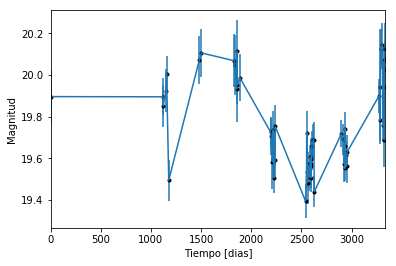

In [2]:
data = np.genfromtxt('LC_15195_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

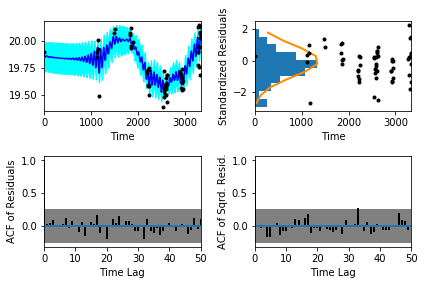

In [5]:
sample.assess_fit()

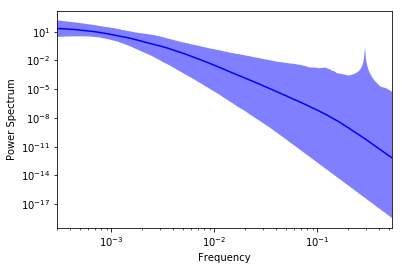

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.761515,'Medida del nivel de ruido')

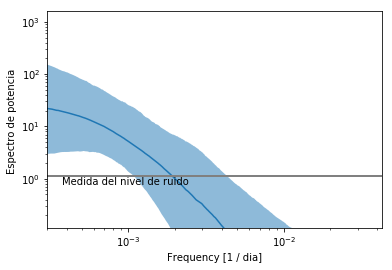

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

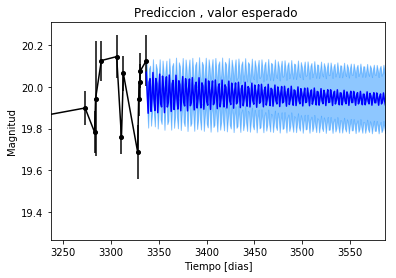

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

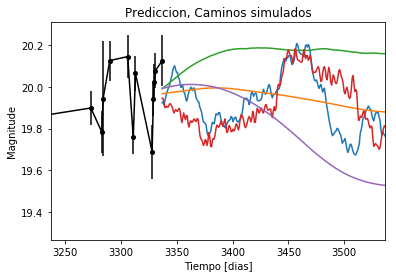

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


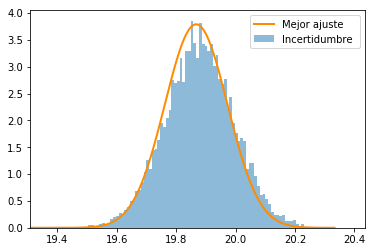

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

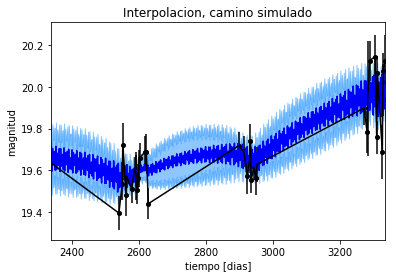

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

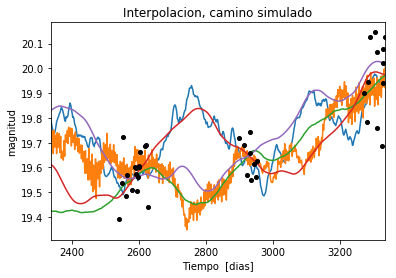

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


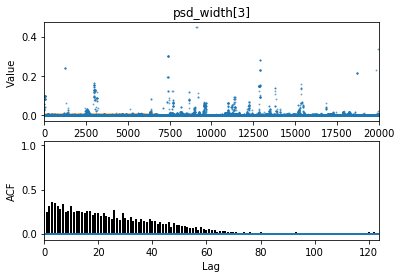

In [15]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [16]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 613.842057886
Median: 0.00662637272896
Standard deviation: 0.18630933525
68% credibility interval: [ 0.00071571  0.14004702]
95% credibility interval: [  3.34565558e-04   7.56313912e-01]
99% credibility interval: [  3.10127308e-04   9.88045435e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 828.757318321
Median: 0.00133385527486
Standard deviation: 0.0834749234041
68% credibility interval: [ 0.00044376  0.01712137]
95% credibility interval: [ 0.00031892  0.25832692]
99% credibility interval: [  3.03884836e-04   6.78867336e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 588.966985793
Median: 0.0134575520746
Standard 

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 192.924253661
Median: 0.00698107982024
Standard deviation: 0.232306471551
68% credibility interval: [ 0.          0.29628184]
95% credibility interval: [ 0.          0.85533305]
99% credibility interval: [ 0.         1.0349476]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 192.924253661
Median: 0.00698107982024
Standard deviation: 0.232306471551
68% credibility interval: [ 0.          0.29628184]
95% credibility interval: [ 0.          0.85533305]
99% credibility interval: [ 0.         1.0349476]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1345.56666148
Median: 0.0
Standard deviation: 0.00044995015098
68% credi

Plotting parameter summary


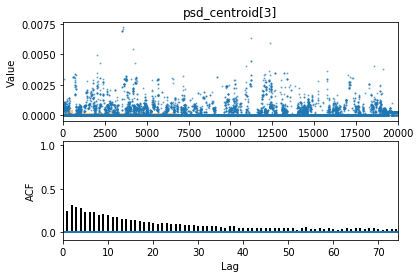

In [20]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [21]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1763.71219328
Median: 63.4001460278
Standard deviation: 1.79727011471
68% credibility interval: [ 61.68477858  64.5659672 ]
95% credibility interval: [ 59.11153743  67.20800667]
99% credibility interval: [ 56.93171491  68.24059298]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 569.542025619
Median: 0.447107850112
Standard deviation: 2.04934191627
68% credibility interval: [ 0.04427068  3.19736098]
95% credibility interval: [ 0.01230093  6.96419764]
99% credibility interval: [  8.74248689e-03   9.77779518e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 309.482443687
Median: 0.275745730777
Standard deviation: 8.4689034656
68% credibility interval: [ 0.0080263   6.21271644]
95% credibility interval: [  5.88

Plotting parameter summary


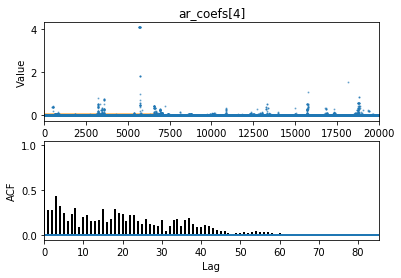

In [25]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [26]:
 centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [27]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20022.0915313
Median: 1.54296827483e-30
Standard deviation: 2.99268317676e+126
68% credibility interval: [  3.27679023e-79   2.80515457e-09]
95% credibility interval: [  5.15921324e-189   9.17785124e+093]
99% credibility interval: [  1.16298606e-243   2.05504528e+123]


In [28]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2026.74541115
Median: 19.8357507407
Standard deviation: 0.125152626397
68% credibility interval: [ 19.74107237  19.94173571]
95% credibility interval: [ 19.62370131  20.11737183]
99% credibility interval: [ 19.48140936  20.30383642]


Plotting parameter summary


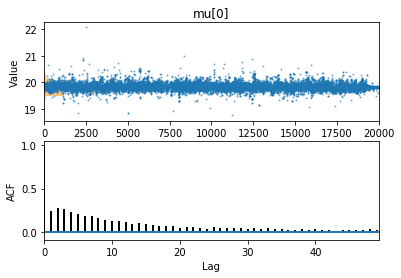

In [30]:
sample.plot_parameter('mu', 0, doShow=True)

In [31]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

Plotting parameter summary


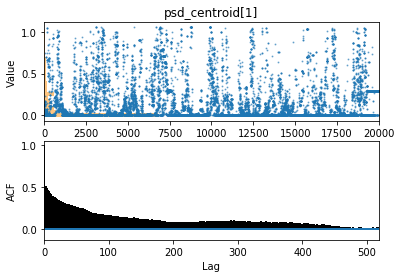

In [32]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [33]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1763.71219328
Median: 63.4001460278
Standard deviation: 1.79727011471
68% credibility interval: [ 61.68477858  64.5659672 ]
95% credibility interval: [ 59.11153743  67.20800667]
99% credibility interval: [ 56.93171491  68.24059298]


Plotting parameter summary


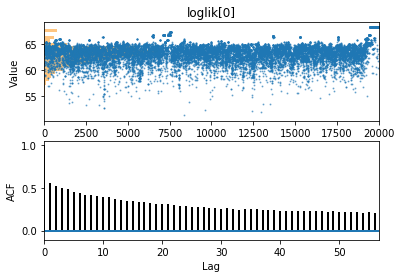

In [35]:
sample.plot_parameter('loglik', 0, doShow=True)

In [36]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [37]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2388.13993439
Median: 0.0447057715334
Standard deviation: 0.0779897044805
68% credibility interval: [ 0.02446454  0.09293788]
95% credibility interval: [ 0.01588289  0.22752629]
99% credibility interval: [ 0.01170103  0.4787739 ]


Plotting parameter summary


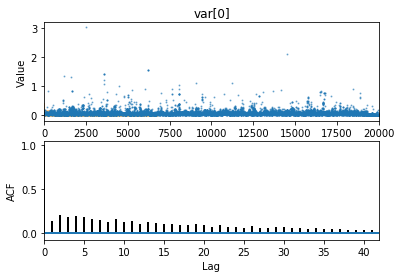

In [38]:
sample.plot_parameter('var', 0, doShow=True)

In [39]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [40]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1259.48427997
Median: 1.21704460448
Standard deviation: 0.191026016689
68% credibility interval: [ 1.04852621  1.41622831]
95% credibility interval: [ 0.87739872  1.64701924]
99% credibility interval: [ 0.80081592  1.79811474]


Plotting parameter summary


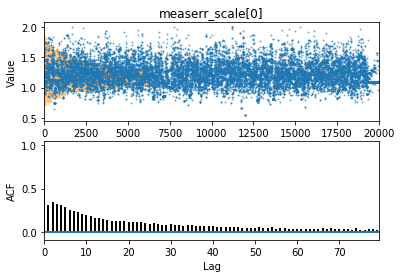

In [41]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [42]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [43]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1067.99380823
Median: 5.41030748092e-05
Standard deviation: 0.228813229876
68% credibility interval: [  4.08593657e-07   4.53294291e-03]
95% credibility interval: [  3.92828764e-96   2.26934830e-01]
99% credibility interval: [  7.42285744e-129   1.26955521e+000]


Plotting parameter summary


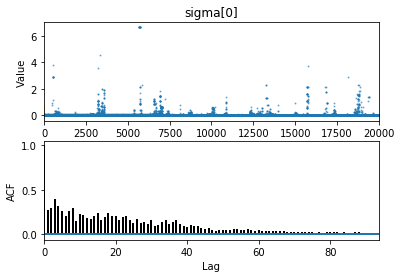

In [44]:
sample.plot_parameter('sigma', 0, doShow=True)

In [45]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [46]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 613.842057886
Median: (-0.0416347277705-4.31620539572j)
Standard deviation: 1.87105478282
68% credibility interval: [-0.87994138+0.j         -0.00449695-0.04796668j]
95% credibility interval: [ -4.75206046e+00+0.j          -2.10213740e-03-0.01170754j]
99% credibility interval: [ -6.20807256e+00+0.j          -1.94858734e-03-0.00377042j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 828.757318321
Median: (-0.0083808598649+0.0199719015131j)
Standard deviation: 1.5509971287
68% credibility interval: [-0.10757673+0.j -0.00278821+0.j]
95% credibility interval: [-1.62311592 +2.98687568e+00j -0.00200383 +1.00613829e-04j]
99% credibility interval: [ -4.26544927e+00+4.66490534j  -1.90936474e-03+0.j        ]
Posterior summary f